# Class 11: Part 1

NYU Tandon C4SUE @avigailvantu , April 2021

## Working and displaying line and polygon data 
GeoPandas can produce maps pretty quickly, with just a few lines of code. Today will look further into some data types and learn how not only create a map, but also how to control some aspects. In the first section of this class we will look into line data of bike lanes, polygon data (senior safe zones), and point data 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

Today we will see a few additional ways to work with spatial data on Jupyter. Last session we touched upon transforming data from dataframe into geodataframe. This is a cool way to map and visualize x,y data that comes in CSV files. Today we will load shpfiles into Jupyter. Because this is a geo based data it let's us visualize the data right away.

# NYC Bike Lanes 



In [2]:
#here I am loading the bike lanes data
#note that I am loading all files in the folder, hence I do not specify the data extension (.shp)
bike_lane = gpd.read_file('Bicycle Routes')

In [3]:
bike_lane.head()

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_leng,street,tf2facilit,tf_facilit,tostreet,geometry
0,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,53.0,131.771990,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24993 40.50088, -74.24969 40.5..."
1,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,57.0,268.689582,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24916 40.49872, -74.24935 40.4..."
2,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,59.0,420.193253,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24935 40.49944, -74.24969 40.5..."
3,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,61.0,238.242198,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25185 40.50281, -74.25177 40.5..."
4,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,64.0,646.293832,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25133 40.50229, -74.24993 40.5..."


Note that we already have a geometry column in the data. This means we can visualize the data right away ----> 

<AxesSubplot:>

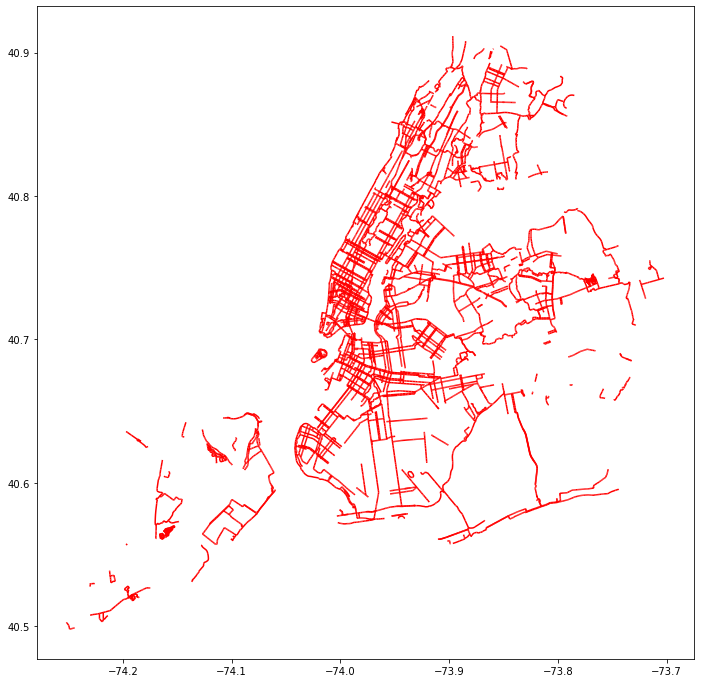

In [4]:


bike_lane.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)

Now let's check out more functionalities.. 

In [5]:
#knowing what the columns in the data
bike_lane.columns

Index(['allclasses', 'bikedir', 'boro', 'comments', 'facilitycl', 'fromstreet',
       'ft2facilit', 'ft_facilit', 'lanecount', 'onoffst', 'segmentid',
       'shape_leng', 'street', 'tf2facilit', 'tf_facilit', 'tostreet',
       'geometry'],
      dtype='object')

I now want to filter the data and display it by the boro column. Note the boro columns contains numeric values (1-5), and not the actual name. Let's check it out: 

In [6]:
bike_lane['boro']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
19870    2.0
19871    2.0
19872    2.0
19873    2.0
19874    2.0
Name: boro, Length: 19875, dtype: float64

# Working with the NYC boro codes:

These are the numeric code--borough names. 

1. Manhattan (New York County)
2. Bronx (Bronx County)
3. Brooklyn (Kings County)
4. Queens (Queens County)
5. Staten Island (Richmond County)

In [7]:
#let's filter to only have Manhattan's bike lanes: 

bike_lane[bike_lane['boro']==1].head(3)

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_leng,street,tf2facilit,tf_facilit,tostreet,geometry
31,"II,III",2,1.0,limited access road (parks),II,W 79 ST,None,Curbside,2.0,OFF,2416.0,440.773031,79 ST NORTH ACCESS RAMP,None,Sharrows,HUDSON RIVER GREENWAY 79TH ST LINK,"LINESTRING (-74.19697 40.55756, -74.19602 40.5..."
549,I,2,1.0,None,I,GOVERNORS ISLAND GREENWAY,None,Greenway,2.0,OFF,17971.0,249.343238,GOVERNORS ISLAND GREENWAY,None,Greenway,GOVERNORS ISLAND GREENWAY,"LINESTRING (-74.02114 40.68514, -74.02191 40.6..."
550,I,2,1.0,None,I,GOVERNORS ISLAND GREENWAY,None,Greenway,2.0,OFF,17975.0,291.379429,GOVERNORS ISLAND GREENWAY,None,Greenway,GOVERNORS ISLAND GREENWAY,"LINESTRING (-74.02024 40.68555, -74.02114 40.6..."


In [8]:
len(bike_lane[bike_lane['boro']==1])

5396

We get only bike lanes that are inside Manhattan, there are a total of 5266 of them!

# Filter data to plot one borough at time

This feature is extremely useful to narrow down the map scope, but it requires having categories in the data to work with. Luckily for us the bike lane data comes with the boro code so this is all pretty straight forward. If this was not imidiatly available to us we could have merge with the borough layer for example (we will see how to marge geo data frames in the 2dn section of this class). 

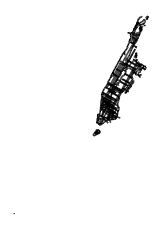

In [9]:
#now let's plot them: 

bike_lane[bike_lane['boro']==1].plot(color='k')
plt.axis('off')
plt.show()

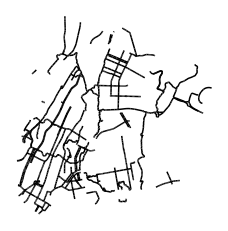

In [10]:
#plot the Bronx bike lanes

bike_lane[bike_lane['boro']==2].plot(color='k')
plt.axis('off')
plt.show()

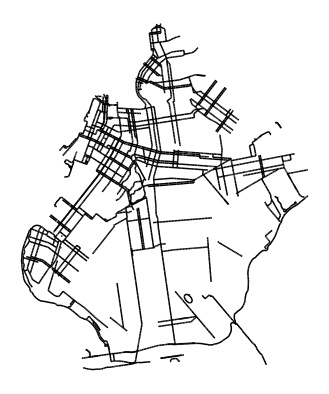

In [11]:
#plot bike lanes for Brooklyn only 
bike_lane[bike_lane['boro']==3].plot(figsize=(8, 7),color='k')
plt.axis('off')
plt.show()

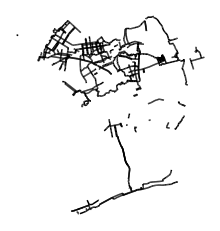

In [12]:
#plot Queens only: 
bike_lane[bike_lane['boro']==4].plot(color='k')
plt.axis('off')
plt.show()

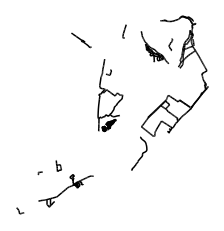

In [13]:
#and finaly, plot Staten Island 
bike_lane[bike_lane['boro']==5].plot(color='k')
plt.axis('off')
plt.show()

In [14]:
# count number of bike lanes per boro :

print ('Manhattan # of bike lanes',len(bike_lane[bike_lane['boro']==1]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))
print ('Bronx # of bike lanes',len(bike_lane[bike_lane['boro']==2]))
print ('Brooklyn # of bike lanes',len(bike_lane[bike_lane['boro']==3]))
print ('Queens # of bike lanes',len(bike_lane[bike_lane['boro']==4]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))

Manhattan # of bike lanes 5396
Staten Island # of bike lanes 1092
Bronx # of bike lanes 2977
Brooklyn # of bike lanes 5696
Queens # of bike lanes 4714
Staten Island # of bike lanes 1092


## Types of bikelanes

As we will see soon ,the NYC bike lane data can get us the specifics of the each bike lane type. Let's look into two columns to learn more about the types of bike lanes: 
1. ft_facilit
2. tf_facilit

In [15]:

bike_lane.ft_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', 'Signed Route', None, 'Bike-Friendly Parking',
       'Buffered Conventional', 'Boardwalk', 'Buffered', 'Ped Plaza',
       'Dirt Trail', 'Link', '<Null>', 'Dirt Path'], dtype=object)

In [16]:

bike_lane.tf_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', None, 'Signed Route', 'Buffered Conventional',
       'Bike-Friendly Parking', 'Boardwalk', 'Sharrows/Standard',
       'Buffered', 'Curbside/Sharrows', 'Standard/Sharrows', 'Ped Plaza',
       'Sharrows/Protected Path', 'Dirt Trail', 'Velodrome', 'Link',
       'Dirt Path'], dtype=object)

They both seem to have mostly the same categories, when ft_facilit seem to have slightly simpler. But the tf_facilit gives us more intresting details that's why I chose it. 

Let's plot the data so that it is diplayed only 

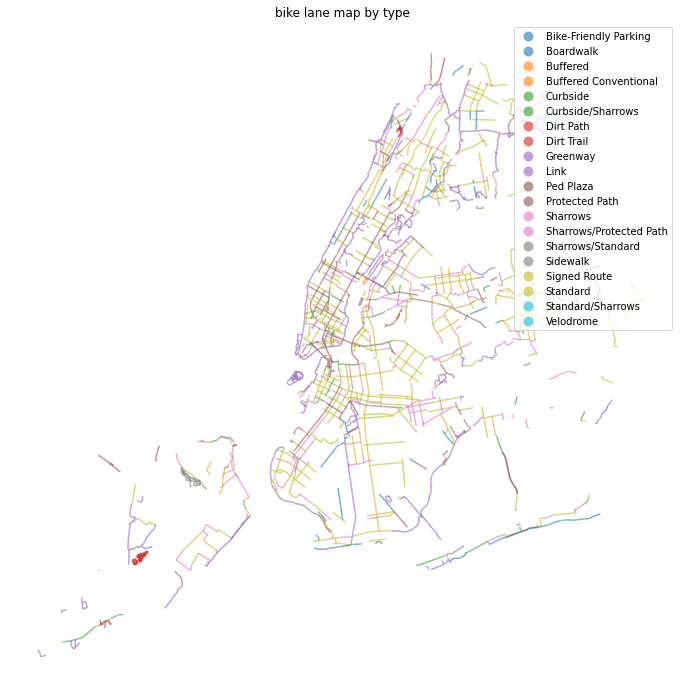

In [17]:
ax = bike_lane.plot(column='tf_facilit',legend=True,figsize=(12, 20), alpha = 0.6,markersize=2)

plt.title('bike lane map by type')

plt.axis('off')


plt.show()

In [18]:
#let's see the number of rows per unique value of bike path type: 
bike_lane['tf_facilit'].value_counts()

Standard                   5227
Sharrows                   2571
Greenway                   2362
Protected Path             2088
Curbside                    634
Bike-Friendly Parking       529
Signed Route                432
Sidewalk                    347
Boardwalk                   159
Dirt Trail                   64
Buffered Conventional        41
Buffered                     37
Dirt Path                    36
Ped Plaza                    13
Link                          8
Velodrome                     3
Curbside/Sharrows             2
Sharrows/Standard             2
Standard/Sharrows             1
Sharrows/Protected Path       1
Name: tf_facilit, dtype: int64

In [19]:
# plot only MN by bike lane type:

bike_laneMN = bike_lane[bike_lane['boro']==1]

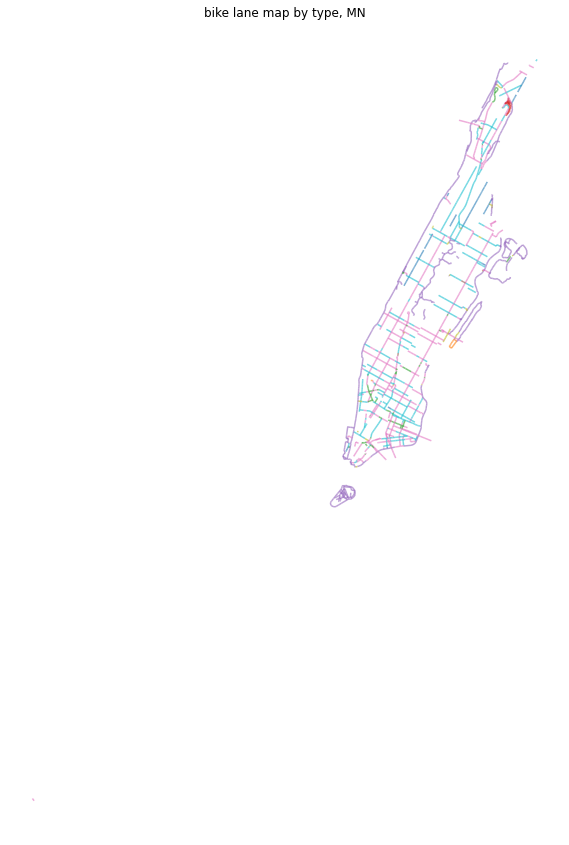

In [20]:
labels = bike_laneMN.tf_facilit

ax = bike_laneMN.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, MN')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

## Ploygon data: Senior Priority Zones: 



In [21]:
safe_streeets = gpd.read_file("VZV_Safe Streets for Seniors")

In [22]:
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
safe_streeets.head()

,name,shape_area,shape_leng,geometry
0,Astoria,8.306479e+06,14763.582784,"POLYGON ((-73.91899 40.76577, -73.91978 40.766..."
1,Bath Beach,1.187964e+07,15515.138903,"POLYGON ((-73.99154 40.59039, -73.99161 40.590..."
2,Bay Ridge,1.475626e+07,21468.007297,"POLYGON ((-74.03382 40.61459, -74.03454 40.614..."
3,Bedford Stuyvesant,4.613148e+07,27438.609830,"POLYGON ((-73.92864 40.69324, -73.92804 40.692..."
4,Bensonhurst,2.399853e+07,23653.773218,"POLYGON ((-73.99015 40.59971, -73.99086 40.600..."


In [24]:
#what are the polygons area? 
safe_streeets.geometry.area.head()

<ipython-input-24-932e6bb44835>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  safe_streeets.geometry.area.head()


0    0.000082
1    0.000117
2    0.000146
3    0.000457
4    0.000237
dtype: float64

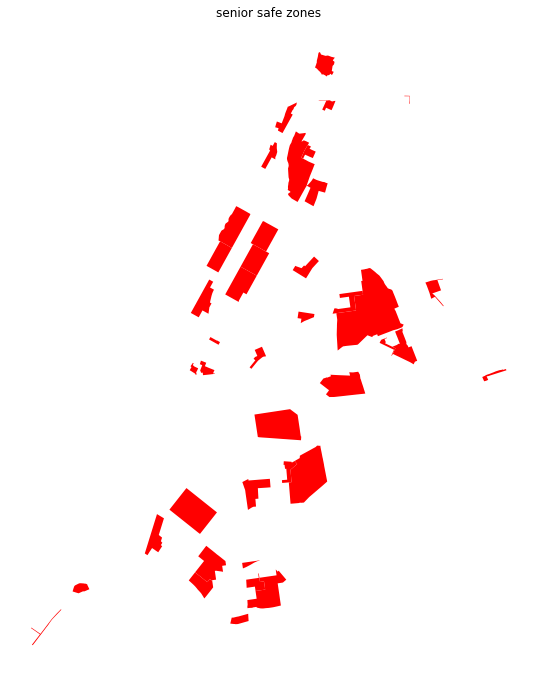

In [25]:

safe_streeets.plot(color='red',figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('senior safe zones')

plt.show()

## Add a point layer: senior centers 

Here we will add a layer of senior centers that the DOT works with. We will try to overlay one with the senior safe zone to see how many senior centers fall inside the safety zones. 

In [26]:
#load the shapfile
senior_centers = gpd.read_file("VZV_Senior Centers")

In [27]:
#what are the columns in the data
senior_centers.columns

Index(['activity', 'event_date', 'lat', 'long', 'site_serve', 'geometry'], dtype='object')

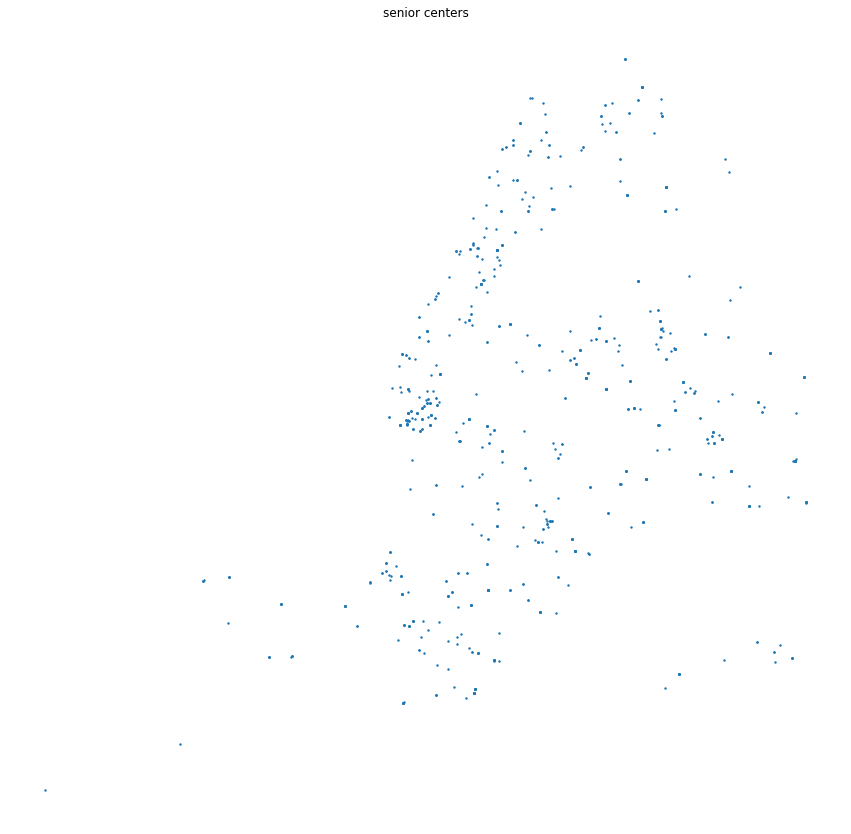

In [28]:
senior_centers.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('senior centers')
plt.show()

# Overlay multiple layers on Pyplot: 

Can we intersect safe zones and senior centers?

In [29]:
#what is the projection of senior safe zones?
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
#what is the projection of senior centers?
senior_centers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both look the same so we should be good to go with overlaying both. 

(-74.26504011945596, -73.70740009178658, 40.510574673913105, 40.91661409471997)

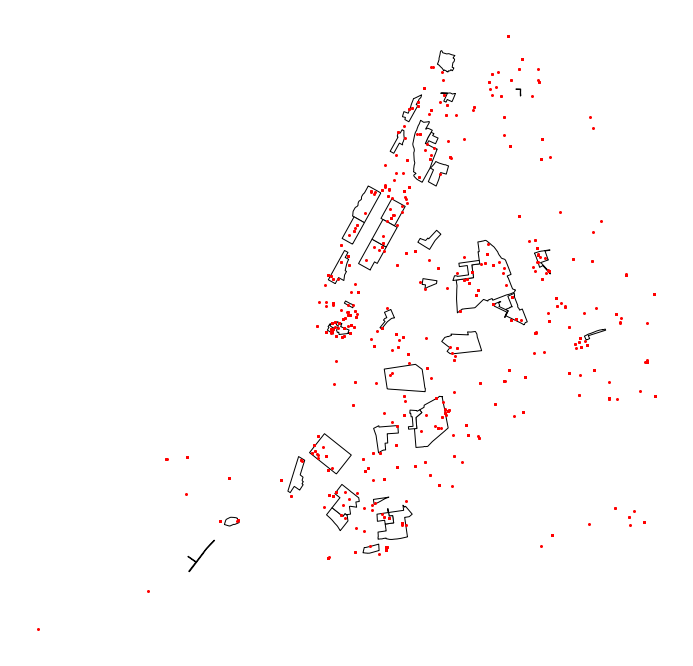

In [31]:
#first we need to set up the layer that is going to be used 
base = safe_streeets.plot(color='white',legend=True,figsize=(20, 12), edgecolor='black')
#now add the senior centers layer: 
senior_centers.plot(ax=base, marker='o', color='red', markersize=4);


plt.axis('off')

## Bonus: Add map background

In [32]:
import contextily as ctx

In [33]:
bike_lane = bike_lane.to_crs(epsg=3857)

In [34]:
# from:https://share.cocalc.com/share/56cef78b3fda5e0338c2da71b222e6b275a9193e/contextily.ipynb?viewer=share 

In [35]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    
    ax.axis((xmin, xmax, ymin, ymax))
    
    

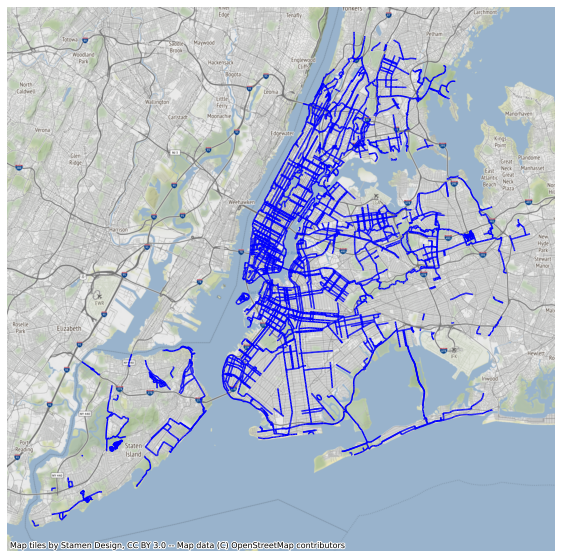

In [36]:
ax = bike_lane.plot(figsize=(10, 10), edgecolor='b')
ctx.add_basemap(ax, zoom=12)
ax.set_axis_off()

## Class assignment

Using any publilcy available data, display the proximity of bike lanes to two important city amenities of your choice. Choose only two boroughs from the city 5 boroughs to display both bike lanes and the amenities for only those two boroughs. Compare the proximity between both selected boroughs. 

What are some of the conclusions that come to mind when thinking about how bike lanes are distributed across the city boroughs? Given your analysis, are there any areas that seem to be lacking bike lanes? If so, where?









In [94]:
drinking_fountains = gpd.read_file("NYC Parks Drinking Fountains")

In [96]:
drinking_fountains.head()

,borough,date_colle,time_colle,department,descriptio,featuresta,fountain_c,fountain_t,gisobjid,gispropnum,objectid,painted,parentid,position,signname,system,geometry
0,B,2018-02-10,00:00:00.000,B-11,"F High Low, Out in Open",Active,2.0,F High Low,100038957,B100,1589.0,no,B100,Out in Open,Seth Low Playground/ Bealin Square,B100-DF0647,POINT (-73.98659 40.60753)
1,M,2018-02-22,00:00:00.000,M-06,"C, In Playground",Active,1.0,C,100039303,M158,1921.0,no,M158,In Playground,Robert Moses Playground,M158-DF0068,POINT (-73.96863 40.74809)
2,M,2018-02-27,00:00:00.000,M-04,"D, Under Tree, Near Ballfield, Just Outside Pl...",Active,1.0,D,100039632,M011,2253.0,yes,M011,"Under Tree, Near Ballfield, Just Outside Playg...",Chelsea Park,M011-DF0209,POINT (-74.00036 40.75004)
3,M,2018-04-04,00:00:00.000,M-03,"D, Just Outside Playground, Near Ballfield",Active,1.0,D,100039936,M144,2585.0,no,M144,"Just Outside Playground, Near Ballfield",John V. Lindsay East River Park,M144-DF0392,POINT (-73.97290 40.72386)
4,B,2018-05-29,00:00:00.000,B-03,"C, In Shade, In Playground",Active,1.0,C,100040304,B302,2917.0,None,B302,"In Shade, In Playground",Charlie's Place,B302-DF0897,POINT (-73.94639 40.69933)


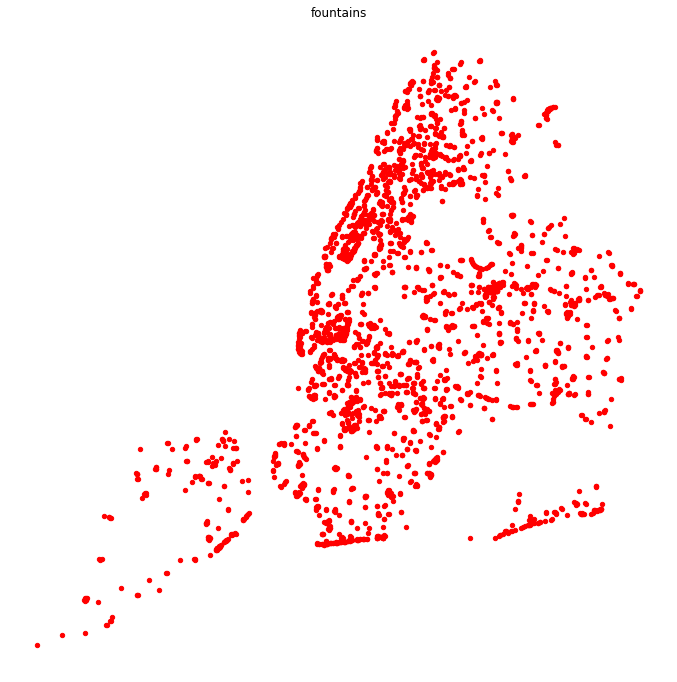

In [98]:
drinking_fountains.plot(color='red',figsize=(12, 12),markersize=19)
plt.axis('off')
plt.title('fountains')

plt.show()

In [99]:
bike_laneQ = bike_lane[bike_lane['boro']==4]

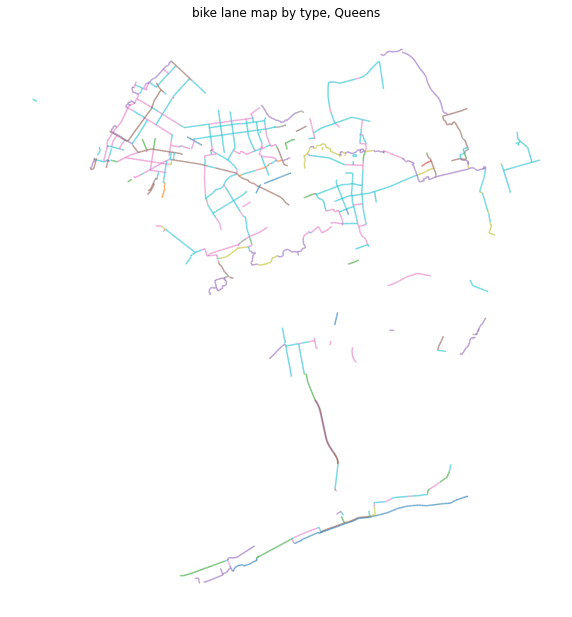

In [100]:
labels = bike_laneQ.tf_facilit

ax = bike_laneQ.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, Queens')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

In [102]:
drinkingQ = drinking_fountains[drinking_fountains['borough']=='Q']
    

In [106]:
drinkingQ.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [108]:
bike_laneQ.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

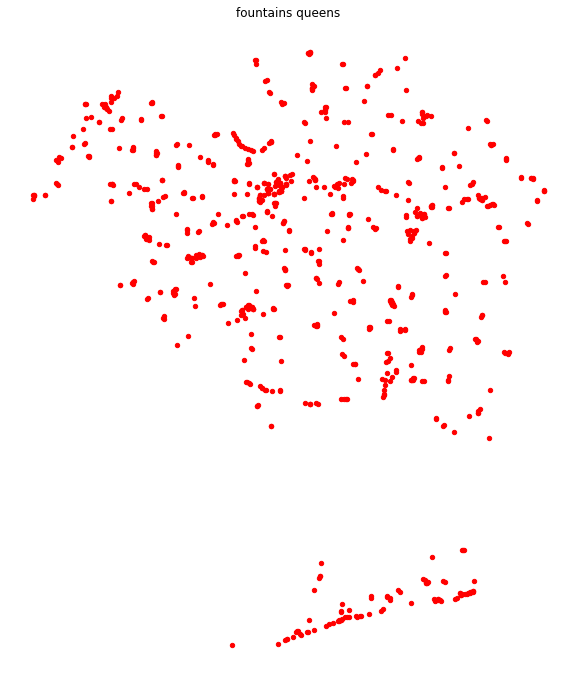

In [126]:
drinkingQ.plot(color='red',figsize=(12, 12),markersize=19)
plt.axis('off')
plt.title('fountains queens')

plt.show()

In [114]:
#Subway Entrances
wifi = gpd.read_file("NYC Wi-Fi Hotspot Locations")

In [115]:
wifi.head()

,date_activ,time_activ,bbl,bin,boro,borocd,borocode,boroct2010,boroname,city,...,objectid,postcode,provider,remarks,sourceid,ssid,type,x,y,geometry
0,2017-11-21,00:00:00.000,3.041480e+09,3327234.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10321.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021921,LinkNYC Free Wi-Fi,Free,1.020156e+06,188524.768013,POINT (-73.87054 40.68406)
1,2017-11-21,00:00:00.000,3.041340e+09,3092471.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10322.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021922,LinkNYC Free Wi-Fi,Free,1.020589e+06,188730.985121,POINT (-73.86897 40.68463)
2,2017-11-21,00:00:00.000,3.041510e+09,3093023.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10323.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021923,LinkNYC Free Wi-Fi,Free,1.020774e+06,188759.119907,POINT (-73.86831 40.68470)
3,2017-12-20,00:00:00.000,3.041520e+09,3093078.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10324.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021925,LinkNYC Free Wi-Fi,Free,1.021198e+06,188916.199973,POINT (-73.86678 40.68513)
4,2018-02-06,00:00:00.000,3.036690e+09,3083275.0,BK,305.0,3.0,3119800.0,Brooklyn,Brooklyn,...,10325.0,11207.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021926,LinkNYC Free Wi-Fi,Free,1.012774e+06,185751.116409,POINT (-73.89717 40.67647)


In [116]:
wifi_BK=wifi[wifi['boro']=='BK']

In [117]:
wifi_BK

,date_activ,time_activ,bbl,bin,boro,borocd,borocode,boroct2010,boroname,city,...,objectid,postcode,provider,remarks,sourceid,ssid,type,x,y,geometry
0,2017-11-21,00:00:00.000,3.041480e+09,3327234.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10321.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021921,LinkNYC Free Wi-Fi,Free,1.020156e+06,188524.768013,POINT (-73.87054 40.68406)
1,2017-11-21,00:00:00.000,3.041340e+09,3092471.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10322.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021922,LinkNYC Free Wi-Fi,Free,1.020589e+06,188730.985121,POINT (-73.86897 40.68463)
2,2017-11-21,00:00:00.000,3.041510e+09,3093023.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10323.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021923,LinkNYC Free Wi-Fi,Free,1.020774e+06,188759.119907,POINT (-73.86831 40.68470)
3,2017-12-20,00:00:00.000,3.041520e+09,3093078.0,BK,305.0,3.0,3118400.0,Brooklyn,Brooklyn,...,10324.0,11208.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021925,LinkNYC Free Wi-Fi,Free,1.021198e+06,188916.199973,POINT (-73.86678 40.68513)
4,2018-02-06,00:00:00.000,3.036690e+09,3083275.0,BK,305.0,3.0,3119800.0,Brooklyn,Brooklyn,...,10325.0,11207.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-021926,LinkNYC Free Wi-Fi,Free,1.012774e+06,185751.116409,POINT (-73.89717 40.67647)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,2017-01-20,00:00:00.000,3.020930e+09,3058594.0,BK,302.0,3.0,3003300.0,Brooklyn,Brooklyn,...,12081.0,11201.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000045,LinkNYC Free Wi-Fi,Free,9.896265e+05,190244.024417,POINT (-73.98061 40.68885)
3315,2018-01-08,00:00:00.000,3.001850e+09,3000981.0,BK,302.0,3.0,3003900.0,Brooklyn,Brooklyn,...,12082.0,11217.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000046,LinkNYC Free Wi-Fi,Free,9.895565e+05,188920.521487,POINT (-73.98087 40.68522)
3316,2018-02-01,00:00:00.000,3.001838e+09,3255607.0,BK,302.0,3.0,3004100.0,Brooklyn,Brooklyn,...,12083.0,11217.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000047,LinkNYC Free Wi-Fi,Free,9.884185e+05,189500.763109,POINT (-73.98497 40.68681)
3317,2018-01-05,00:00:00.000,3.002800e+09,3002846.0,BK,302.0,3.0,3004300.0,Brooklyn,Brooklyn,...,12084.0,11201.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000049,LinkNYC Free Wi-Fi,Free,9.861506e+05,189897.318418,POINT (-73.99315 40.68790)


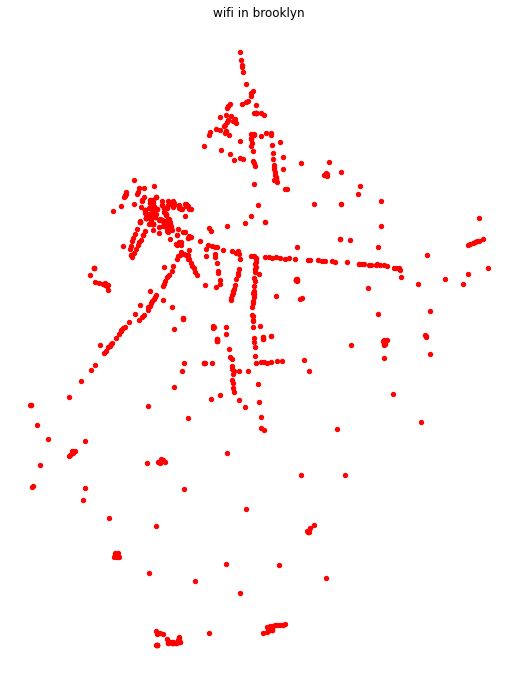

In [124]:
wifi_BK.plot(color='red',figsize=(12, 12),markersize=19)
plt.axis('off')
plt.title('wifi in brooklyn')

plt.show()

In [120]:
bike_laneBK = bike_lane[bike_lane['boro']==3]

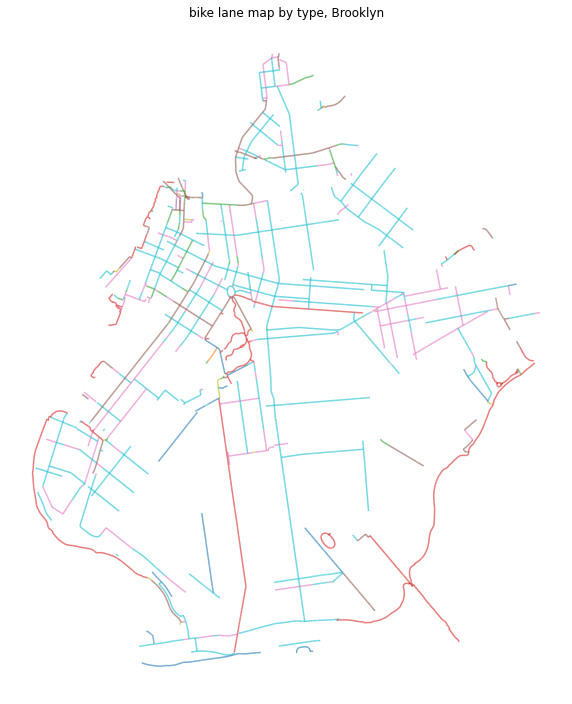

In [123]:
labels = bike_laneBK.tf_facilit

ax = bike_laneBK.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, Brooklyn')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

What are some of the conclusions that come to mind when thinking about how bike lanes are distributed across the city boroughs? 
The bikes routes in Manhattan cover alot more ground. From upper manhattan to lower manhattan, this is probably because of how the borough is shaped. Even though Brooklyn has more bike routes than any other borough, there bike routes are mostly on the outskirts of the borough. There are not too many bike routes connecting upper and lower brooklyn and there isnt any routes connecting the west and east of brooklyn. There also appears to be more bike routes in the touristy areas of brooklyn. Staten Island has the fewest bike routes, people likely use their cars as main form of transportation. Given the size of the Bronx it appears as the bike routes cover a majority of the bronx. there are portions of queens that are not covered by bike routes this could be because the farther you get from the main city (manhattan) you get to more suburban areas. However, areas in queens closer to manhattan have more bike routes. LIC has alot of bike routes along with astoria and east elmhurst.





Given your analysis, are there any areas that seem to be lacking bike lanes? If so, where?
Alot of areas in queens seem to be lacking bike routes, given the big area/population of queens there should be more bike routes. There should be more bike routes connecting the upper and lower queens. This goes for brooklyn there should be more bike routes connecting the east and west of brooklyn.










